# Tutorial: NumPy

In [1]:
__author__ = "Christopher Potts, Will Monroe, and Lucy Li"
__version__ = "CS224u, Stanford, Spring 2022"

## Contents

1. [Motivation](#Motivation)
1. [Vectors](#Vectors)
    1. [Vector Initialization](#Vector-Initialization)
    1. [Vector indexing](#Vector-indexing)
    1. [Vector assignment](#Vector-assignment)
    1. [Vectorized operations](#Vectorized-operations)
    1. [Comparison with Python lists](#Comparison-with-Python-lists)
1. [Matrices](#Matrices)
    1. [Matrix initialization](#Matrix-initialization)
    1. [Matrix indexing](#Matrix-indexing)
    1. [Matrix assignment](#Matrix-assignment)
    1. [Matrix reshaping](#Matrix-reshaping)
    1. [Numeric operations](#Numeric-operations)
1. [Practical example: a shallow neural network](#Practical-example:-a-shallow-neural-network)
1. [Going beyond NumPy alone](#Going-beyond-NumPy-alone)
    1. [Pandas](#Pandas)
    1. [Scikit-learn](#Scikit-learn)
    1. [SciPy](#SciPy)
    1. [Matplotlib](#Matplotlib)

## Motivation

Why should we care about NumPy? 

- It allows you to perform tons of operations on vectors and matrices. 
- It makes things run faster than naive for-loop implementations (a.k.a. vectorization). 
- We use it in our class (see files prefixed with `np_` in your `cs224u` directory). 
- It's used in a ton in machine learning / AI. 
- Its arrays are often inputs into other important Python packages' functions. 

In Jupyter notebooks, NumPy documentation is two clicks away: Help -> NumPy reference. 

## Vectors

In [3]:
import numpy as np

### Vector Initialization

In [3]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [4]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [5]:
# convert list to numpy array
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [6]:
# convert numpy array to list
np.ones(5).tolist()

[1.0, 1.0, 1.0, 1.0, 1.0]

In [7]:
# one float => all floats
np.array([1.0, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.])

In [8]:
# same as above
np.array([1, 2, 3, 4, 5], dtype="float")

array([1., 2., 3., 4., 5.])

In [9]:
# spaced values in interval
np.array([x for x in range(20) if x % 2 == 0])

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [10]:
# same as above
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# random floats in [0, 1)
np.random.random(10)

array([0.73498855, 0.8747517 , 0.21096778, 0.62535706, 0.16202865,
       0.59492923, 0.81269283, 0.51122571, 0.26356335, 0.93557229])

In [12]:
# random integers
np.random.randint(5, 15, size=10)

array([12, 14,  7,  7,  6,  8,  5,  9,  9,  8])

### Vector indexing

In [13]:
x = np.array([10, 20, 30, 40, 50])

In [14]:
x[0]

10

In [15]:
# slice
x[0:2]

array([10, 20])

In [16]:
x[0:1000]

array([10, 20, 30, 40, 50])

In [17]:
# last value
x[-1]

50

In [18]:
# last value as array
x[[-1]]

array([50])

In [19]:
# last 3 values
x[-3:]

array([30, 40, 50])

In [20]:
# pick indices
x[[0, 2, 4]]

array([10, 30, 50])

### Vector assignment

Be careful when assigning arrays to new variables! 

In [21]:
# x2 = x # try this line instead
x2 = x.copy()

In [22]:
x2[0] = 10

x2

array([10, 20, 30, 40, 50])

In [23]:
x2[[1, 2]] = 10

x2

array([10, 10, 10, 40, 50])

In [24]:
x2[[3, 4]] = [0, 1]

x2

array([10, 10, 10,  0,  1])

In [25]:
# check if the original vector changed
x

array([10, 20, 30, 40, 50])

### Vectorized operations

In [26]:
x.sum()

150

In [27]:
x.mean()

30.0

In [28]:
x.max()

50

In [29]:
x.argmax()

4

In [30]:
np.log(x)

array([2.30258509, 2.99573227, 3.40119738, 3.68887945, 3.91202301])

In [31]:
np.exp(x)

array([2.20264658e+04, 4.85165195e+08, 1.06864746e+13, 2.35385267e+17,
       5.18470553e+21])

In [32]:
x + x  # Try also with *, -, /, etc.

array([ 20,  40,  60,  80, 100])

In [33]:
x + 1

array([11, 21, 31, 41, 51])

### Comparison with Python lists

Vectorizing your mathematical expressions can lead to __huge__ performance gains. The following example is meant to give you a sense for this. It compares applying `np.log` to each element of a list with 10 million values with the same operation done on a vector.

In [1]:
# log every value as list, one by one
def listlog(vals):
    return [np.log(y) for y in vals]

In [4]:
# get random vector
samp = np.random.random_sample(int(1e7)) + 1
samp

array([1.67680319, 1.77314997, 1.92503532, ..., 1.13802433, 1.9825558 ,
       1.14871664])

In [5]:
%time _ = np.log(samp)

CPU times: user 78.2 ms, sys: 11.1 ms, total: 89.2 ms
Wall time: 85.7 ms


In [6]:
%time _ = listlog(samp)

CPU times: user 2.75 s, sys: 41.1 ms, total: 2.8 s
Wall time: 2.8 s


## Matrices

The matrix is the core object of machine learning implementations. 

### Matrix initialization

In [38]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
np.array([[1, 2, 3], [4, 5, 6]], dtype="float")

array([[1., 2., 3.],
       [4., 5., 6.]])

In [40]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [41]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [42]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### Matrix indexing

In [44]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
X[0]

array([1, 2, 3])

In [46]:
X[0, 0]

1

In [47]:
# get row
X[0, :]

array([1, 2, 3])

In [48]:
# get column
X[:, 0]

array([1, 4])

In [49]:
# get multiple columns
X[:, [0, 2]]

array([[1, 3],
       [4, 6]])

### Matrix assignment

In [50]:
# X2 = X # try this line instead
X2 = X.copy()

X2

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
X2[0, 0] = 20

X2

array([[20,  2,  3],
       [ 4,  5,  6]])

In [52]:
X2[0] = 3

X2

array([[3, 3, 3],
       [4, 5, 6]])

In [53]:
X2[:, -1] = [5, 6]

X2

array([[3, 3, 5],
       [4, 5, 6]])

In [54]:
# check if original matrix changed
X

array([[1, 2, 3],
       [4, 5, 6]])

### Matrix reshaping

In [7]:
z = np.arange(1, 7)

z

array([1, 2, 3, 4, 5, 6])

In [8]:
z.shape

(6,)

In [9]:
Z = z.reshape(2, 3)

Z

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
Z.shape

(2, 3)

In [11]:
Z.reshape(6)

array([1, 2, 3, 4, 5, 6])

In [12]:
# same as above
Z.flatten()

array([1, 2, 3, 4, 5, 6])

In [13]:
# transpose
Z.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### Numeric operations

In [14]:
A = np.array(range(1, 7), dtype="float").reshape(2, 3)

A

array([[1., 2., 3.],
       [4., 5., 6.]])

In [15]:
B = np.array([1, 2, 3])

In [16]:
# not the same as A.dot(B)
A * B

array([[ 1.,  4.,  9.],
       [ 4., 10., 18.]])

In [17]:
A + B

array([[2., 4., 6.],
       [5., 7., 9.]])

In [18]:
A / B

array([[1. , 1. , 1. ],
       [4. , 2.5, 2. ]])

In [19]:
# matrix multiplication
A.dot(B), A @ B

(array([14., 32.]), array([14., 32.]))

In [20]:
B.dot(A.T)

array([14., 32.])

In [21]:
A.dot(A.T)

array([[14., 32.],
       [32., 77.]])

In [22]:
# outer product
# multiplying each element of first vector by each element of the second
np.outer(B, B)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

## Practical example: a shallow neural network

The following is a practical example of numerical operations on NumPy matrices. 

In our class, we have a shallow neural network implemented in `np_shallow_neural_network.py`. See how the forward and backward passes use no for loops, and instead takes advantage of NumPy's ability to vectorize manipulations of data. 

```python
def forward_propagation(self, x):
    h = self.hidden_activation(x.dot(self.W_xh) + self.b_xh)
    y = softmax(h.dot(self.W_hy) + self.b_hy)
    return h, y

def backward_propagation(self, h, predictions, x, labels):
    y_err = predictions.copy()
    y_err[np.argmax(labels)] -= 1
    d_b_hy = y_err
    h_err = y_err.dot(self.W_hy.T) * self.d_hidden_activation(h)
    d_W_hy = np.outer(h, y_err)
    d_W_xh = np.outer(x, h_err)
    d_b_xh = h_err
    return d_W_hy, d_b_hy, d_W_xh, d_b_xh
```

The forward pass essentially computes the following: 
    $$h = f(xW_{xh} + b_{xh})$$
    $$y = \text{softmax}(hW_{hy} + b_{hy}),$$
where $f$ is `self.hidden_activation`. 

The backward pass propagates error by computing local gradients and chaining them. Feel free to learn more about backprop [here](http://cs231n.github.io/optimization-2/), though it is not necessary for our class. Also look at this [neural networks case study](http://cs231n.github.io/neural-networks-case-study/) to see another example of how NumPy can be used to implement forward and backward passes of a simple neural network. 

## Going beyond NumPy alone

These are examples of how NumPy can be used with other Python packages. 

### Pandas
We can convert numpy matrices to Pandas dataframes. In the following example, this is useful because it allows us to label each row. You may have noticed this being done in our first unit on distributed representations. 

In [23]:
import pandas as pd

In [24]:
count_df = pd.DataFrame(
    np.array(
        [
            [1, 0, 1, 0, 0, 0],
            [0, 1, 0, 1, 0, 0],
            [1, 1, 1, 1, 0, 0],
            [0, 0, 0, 0, 1, 1],
            [0, 0, 0, 0, 0, 1],
        ],
        dtype="float64",
    ),
    index=["gnarly", "wicked", "awesome", "lame", "terrible"],
)
count_df

,0,1,2,3,4,5
gnarly,1.0,0.0,1.0,0.0,0.0,0.0
wicked,0.0,1.0,0.0,1.0,0.0,0.0
awesome,1.0,1.0,1.0,1.0,0.0,0.0
lame,0.0,0.0,0.0,0.0,1.0,1.0
terrible,0.0,0.0,0.0,0.0,0.0,1.0


### Scikit-learn

In `sklearn`, NumPy matrices are the most common input and output and thus a key to how the library's numerous methods can work together. Many of the cs224u's model built by Chris operate just like `sklearn` ones, such as the classifiers we used for our sentiment analysis unit. 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [26]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(type(X))
print("Dimensions of X:", X.shape)
print(type(y))
print("Dimensions of y:", y.shape)

<class 'numpy.ndarray'>
Dimensions of X: (150, 4)
<class 'numpy.ndarray'>
Dimensions of y: (150,)


In [27]:
# split data into train/test
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3
)
print("X_iris_train:", type(X_iris_train))
print("y_iris_train:", type(y_iris_train))
print()

# start up model
maxent = LogisticRegression(fit_intercept=True, solver="liblinear", multi_class="auto")

# train on train set
maxent.fit(X_iris_train, y_iris_train)

# predict on test set
iris_predictions = maxent.predict(X_iris_test)
fnames_iris = iris["feature_names"]
tnames_iris = iris["target_names"]

# how well did our model do?
print(classification_report(y_iris_test, iris_predictions, target_names=tnames_iris))

X_iris_train: <class 'numpy.ndarray'>
y_iris_train: <class 'numpy.ndarray'>

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.75      0.83        16
   virginica       0.76      0.93      0.84        14

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



### SciPy

SciPy contains what may seem like an endless treasure trove of operations for linear algebra, optimization, and more.  It is built so that everything can work with NumPy arrays. 

In [28]:
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from scipy import linalg

In [29]:
# cosine distance
a = np.random.random(10)
b = np.random.random(10)
cosine(a, b)

0.32094197802358315

In [30]:
# pearson correlation (coeff, p-value)
pearsonr(a, b)

PearsonRResult(statistic=-0.16402156701885967, pvalue=0.6507007542479698)

In [31]:
# inverse of matrix
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

To learn more about how NumPy can be combined with SciPy and Scikit-learn for machine learning, check out this [notebook tutorial](https://github.com/cgpotts/csli-summer/blob/master/advanced_python/intro_to_python_ml.ipynb) by Chris Potts and Will Monroe. (You may notice that over half of this current notebook is modified from theirs.) Their tutorial also has some interesting exercises in it! 

### Matplotlib

In [32]:
import matplotlib.pyplot as plt

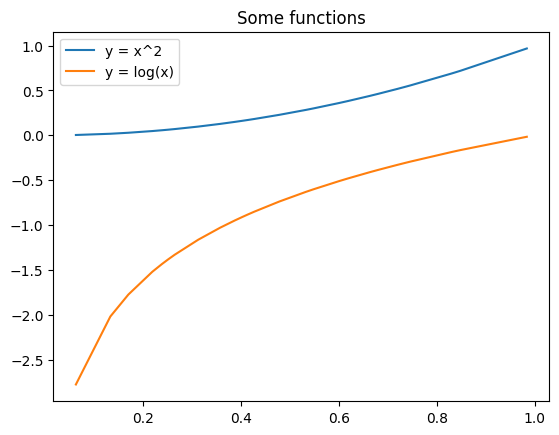

In [33]:
a = np.sort(np.random.random(30))
b = a**2
c = np.log(a)
plt.plot(a, b, label="y = x^2")
plt.plot(a, c, label="y = log(x)")
plt.legend()
plt.title("Some functions")
plt.show()